## Exploratory analysis of the US Airport Dataset

This dataset contains data for 5 years[1995, 2000, 2005, 2010, 2015] of flights between various US airports and the carrier on those routes.

Let's see what can we make out of this!

In [1]:
import networkx as nx
import pandas as pd
air_data = pd.read_csv('dump_output.csv')

We create 5 graphs (one for each year), it may take a couple of minutes to load all the graphs.

In [2]:
air_graph_1995 = air_data[air_data.YEAR == 1995]
G_1995 = nx.DiGraph()
for row in air_graph_1995.iterrows():
    G_1995.add_edge(row[1].ORIGIN, row[1].DEST)

In [3]:
air_graph_2000 = air_data[air_data.YEAR == 2000]
G_2000 = nx.DiGraph()
for row in air_graph_2000.iterrows():
    G_2000.add_edge(row[1].ORIGIN, row[1].DEST)

In [4]:
air_graph_2005 = air_data[air_data.YEAR == 2005]
G_2005 = nx.DiGraph()
for row in air_graph_2005.iterrows():
    G_2005.add_edge(row[1].ORIGIN, row[1].DEST)

In [5]:
air_graph_2010 = air_data[air_data.YEAR == 2010]
G_2010 = nx.DiGraph()
for row in air_graph_2010.iterrows():
    G_2010.add_edge(row[1].ORIGIN, row[1].DEST)

In [6]:
air_graph_2015 = air_data[air_data.YEAR == 2015]
G_2015 = nx.DiGraph()
for row in air_graph_2015.iterrows():
    G_2015.add_edge(row[1].ORIGIN, row[1].DEST)

So let's have a look at the important nodes in this network, i.e. important airports in this network. We'll use pagerank, betweenness centrality and degree centrality.

In [7]:
sorted(nx.pagerank(G_2015).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ANC', 0.010425531156396328),
 ('HPN', 0.008715287139161585),
 ('FAI', 0.007865131822111036),
 ('DFW', 0.007168038232113768),
 ('DEN', 0.006557279519803016),
 ('ATL', 0.006367579588749718),
 ('ORD', 0.006178836107660133),
 ('YIP', 0.005821525504523931),
 ('ADQ', 0.005482597083474197),
 ('MSP', 0.005481962582230958)]

In [8]:
sorted(nx.betweenness_centrality(G_2015).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ANC', 0.2890745848058655),
 ('FAI', 0.08042857784594376),
 ('SEA', 0.06745549919241688),
 ('HPN', 0.0604681017853471),
 ('ORD', 0.045544143864829294),
 ('ADQ', 0.040170160000905716),
 ('DEN', 0.03854325136424145),
 ('BFI', 0.03811277548952858),
 ('MSP', 0.037748093423406244),
 ('TEB', 0.036229439542316354)]

In [9]:
sorted(nx.degree_centrality(G_2015).items(), key=lambda x:x[1], reverse=True)[0:10]

[('ATL', 0.3643595863166269),
 ('ORD', 0.354813046937152),
 ('DFW', 0.3420843277645187),
 ('MSP', 0.3261734287987271),
 ('DEN', 0.31821797931583135),
 ('ANC', 0.3046937151949085),
 ('MEM', 0.29196499602227527),
 ('LAX', 0.2840095465393795),
 ('IAH', 0.28082736674622116),
 ('DTW', 0.27446300715990457)]

'ANC' is the airport code of Anchorage airport, a place in Alaska, and according to pagerank and betweenness centrality it is the most important airport in this network Isn't that weird? Thoughts?

related blog post: https://toreopsahl.com/2011/08/12/why-anchorage-is-not-that-important-binary-ties-and-sample-selection/

Let's find the airline which operates the most routes every year? The thing to take into account is routes not flights as this dataset gives us the routes.

In [10]:
airline = [(i, air_data[air_data.YEAR == i].UNIQUE_CARRIER_NAME.value_counts()[0:5].reset_index().rename(columns={0: 'Airline', 'UNIQUE_CARRIER_NAME': 'count'})) for i in [1995, 2000, 2005, 2010, 2015]]

In [11]:
# count of routes of top 5 airlines of each year
airline

[(1995,                         index  count
  0             US Airways Inc.  28606
  1        Delta Air Lines Inc.  21009
  2     Northwest Airlines Inc.  17636
  3       United Air Lines Inc.  17224
  4  Continental Air Lines Inc.  13847),
 (2000,                      index  count
  0          US Airways Inc.  23343
  1    United Air Lines Inc.  21345
  2     Delta Air Lines Inc.  20675
  3  Northwest Airlines Inc.  19715
  4   Southwest Airlines Co.  16603),
 (2005,                          index  count
  0       Southwest Airlines Co.  20869
  1  Federal Express Corporation  19425
  2      Northwest Airlines Inc.  17300
  3        United Air Lines Inc.  15056
  4         Delta Air Lines Inc.  14875),
 (2010,                          index  count
  0       Southwest Airlines Co.  26916
  1         Delta Air Lines Inc.  26914
  2  Federal Express Corporation  17071
  3    Hageland Aviation Service  16127
  4        SkyWest Airlines Inc.  13185),
 (2015,                       index  c

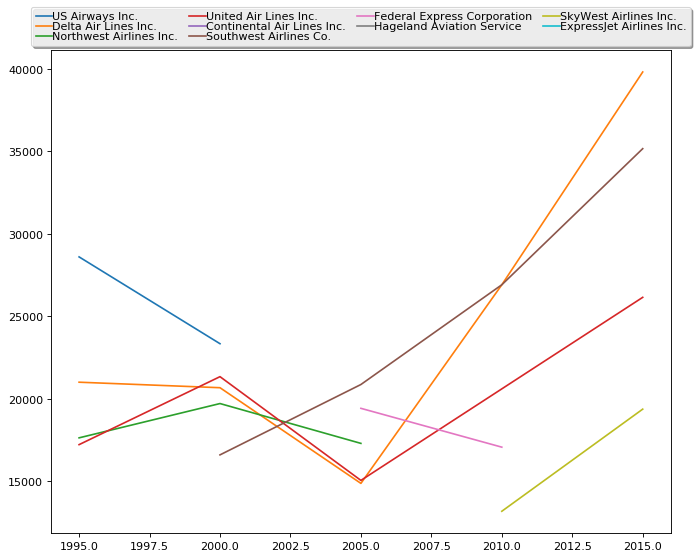

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# dictionary to store data to plot
d = {}
for i, year in airline:
    for row in year.iterrows():
        if row[1][0] in d:
            d[row[1][0]].append((i, row[1][1]))
        else:
            d[row[1][0]] = [(i, row[1][1])]
            
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
labels = []
for i, j in d.items():
    year = [k for k, l in j]
    per = [l for k,l in j]
    plt.plot(year, per)
    labels.append(i)
plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

#### Exercise

Find out the hubs of Delta Air Lines Inc, United Air Lines Inc and Southwest Airlines Co. in this network by measuring the flights that fly out of the airport in 2015.

In [13]:
air_data[(air_data.YEAR == 2015) & (air_data.UNIQUE_CARRIER_NAME == 'Delta Air Lines Inc.')].groupby('ORIGIN')['DEST'].size().sort_values(ascending=False)

ORIGIN
ATL    7250
MSP    3455
DTW    3451
SLC    1707
JFK    1263
LAX    1149
LGA     807
MCO     679
BOS     652
SEA     607
PHX     486
LAS     475
CVG     468
TPA     461
SFO     425
FLL     422
MIA     411
PHL     402
DEN     399
MSY     388
IND     380
EWR     374
PDX     359
BWI     353
MEM     345
MKE     341
ORD     341
CLT     324
RSW     314
DCA     310
       ... 
LNK       2
HUF       2
OCF       2
GRK       2
HOP       1
GCC       1
WRB       1
IDA       1
ITO       1
FMH       1
AZO       1
LFI       1
WRI       1
UXP       1
OFF       1
LRD       1
CID       1
MCN       1
SSC       1
SLN       1
BMG       1
MLU       1
MOT       1
CYS       1
NC1       1
NZY       1
CKB       1
POB       1
CEF       1
MCF       1
dtype: int64

In [14]:
air_data[(air_data.YEAR == 2015) & (air_data.UNIQUE_CARRIER_NAME == 'United Air Lines Inc.')].groupby('ORIGIN')['DEST'].size().sort_values(ascending=False)

ORIGIN
ORD    3034
DEN    2599
IAH    2576
EWR    1896
SFO    1806
IAD    1071
LAX    1005
CLE     525
LAS     514
MCO     488
BOS     448
SEA     408
PHX     398
MSY     396
AUS     360
SAN     355
TPA     325
PDX     322
DFW     320
BWI     281
PHL     277
FLL     276
ATL     258
PIT     250
SAT     247
HNL     227
MSP     217
MIA     209
SMF     207
RSW     201
       ... 
ROA       1
AFW       1
ACY       1
RST       1
AGS       1
PWM       1
TCL       1
AMA       1
MLI       1
PUB       1
MBS       1
INT       1
FAR       1
JAN       1
LAF       1
XNA       1
DLH       1
LIT       1
DAB       1
MCN       1
PIH       1
CPS       1
CPR       1
MDH       1
MGM       1
GTR       1
MSO       1
NTD       1
PDT       1
YKM       1
dtype: int64

In [15]:
air_data[(air_data.YEAR == 2015) & (air_data.UNIQUE_CARRIER_NAME == 'Southwest Airlines Co.')].groupby('ORIGIN')['DEST'].size().sort_values(ascending=False)

ORIGIN
MDW    1699
BWI    1692
DEN    1612
LAS    1599
PHX    1415
DAL    1395
HOU    1341
MCO    1251
TPA    1038
STL     986
BNA     972
ATL     938
LAX     781
MCI     755
AUS     740
FLL     730
SAN     701
OAK     625
MSY     588
MKE     549
SAT     506
IND     442
CMH     410
ABQ     403
SEA     398
SJC     386
RSW     378
PDX     371
PIT     369
SMF     368
       ... 
BKG       1
BIL       1
SPI       1
ITH       1
SYR       1
TLH       1
LWB       1
FOE       1
TWF       1
GTF       1
EUG       1
FAR       1
SLN       1
SAV       1
HTS       1
GRK       1
RFD       1
GRB       1
PVU       1
GPT       1
PIB       1
FAT       1
FSD       1
CLL       1
MGM       1
MHK       1
GFK       1
MWA       1
MLI       1
GLH       1
dtype: int64

In [16]:
air_data[(air_data.YEAR == 2015) & (air_data.UNIQUE_CARRIER_NAME == 'United Air Lines Inc.')].groupby('ORIGIN')['DEST'].size().sort_values(ascending=False)

ORIGIN
ORD    3034
DEN    2599
IAH    2576
EWR    1896
SFO    1806
IAD    1071
LAX    1005
CLE     525
LAS     514
MCO     488
BOS     448
SEA     408
PHX     398
MSY     396
AUS     360
SAN     355
TPA     325
PDX     322
DFW     320
BWI     281
PHL     277
FLL     276
ATL     258
PIT     250
SAT     247
HNL     227
MSP     217
MIA     209
SMF     207
RSW     201
       ... 
ROA       1
AFW       1
ACY       1
RST       1
AGS       1
PWM       1
TCL       1
AMA       1
MLI       1
PUB       1
MBS       1
INT       1
FAR       1
JAN       1
LAF       1
XNA       1
DLH       1
LIT       1
DAB       1
MCN       1
PIH       1
CPS       1
CPR       1
MDH       1
MGM       1
GTR       1
MSO       1
NTD       1
PDT       1
YKM       1
dtype: int64

Average shortest path lenght of this network?

In [17]:
nx.average_shortest_path_length(G_2015)

NetworkXError: Graph is not weakly connected.

A Graph is connected if there is only one component. A directed graph is strongly connected if every node is reachable from every other node, and is weakly connected if the undirected copy of the graph is connected.

In [18]:
nx.is_weakly_connected(G_2015)

False

What does it mean? The airport datasets has components that an unreachable from each other. Well that's a problem!

In [19]:
list(nx.connected_components(G_2015.to_undirected()))

[{'LA2',
  'ACY',
  'SYB',
  'UNK',
  'NQA',
  'GRF',
  'RAC',
  'DXR',
  'VOK',
  'VWN',
  'IAD',
  'TUP',
  'DFW',
  'VIS',
  'PML',
  'FWH',
  'GRB',
  'MCC',
  'KGK',
  'PAE',
  'WTK',
  'TLA',
  'CMI',
  'GA6',
  'KMO',
  'ME3',
  'PSM',
  'DOV',
  'NUL',
  'NZY',
  'MA5',
  'LEB',
  'ORD',
  'XWA',
  'CNY',
  'BFT',
  'MRI',
  'GLR',
  'PAQ',
  'ARA',
  'TSG',
  'BVU',
  'MRY',
  'LAL',
  'GON',
  'SLC',
  'IMT',
  'PVU',
  'MFE',
  'ILM',
  '1G4',
  'WBB',
  'LWS',
  'MAF',
  'AGC',
  'CHO',
  'RBY',
  'SCC',
  'AVL',
  'LUP',
  'EKO',
  'IAG',
  'JZY',
  'ORI',
  'CLG',
  'DVT',
  'GBD',
  'SYR',
  'BFF',
  'VEL',
  'EWR',
  'TIX',
  'MOU',
  'SPN',
  'PCA',
  'MCO',
  'MXY',
  'AMW',
  'ORH',
  'FNR',
  'JBR',
  'EAT',
  'MCI',
  'NHZ',
  'LSE',
  'SUX',
  'AUW',
  'CKV',
  'BVY',
  'OSU',
  'YKM',
  'EHM',
  'WGO',
  'ANC',
  'CHA',
  'XSD',
  'SKJ',
  'AKI',
  'A72',
  'STL',
  'DAL',
  'ABI',
  'KPV',
  'KOA',
  'FOE',
  'ISO',
  'KY3',
  'ENA',
  'CLU',
  'ONP',
  'ALN',
 

What are the components? A single airport and a component of two airports?

Let's remove these nodes from the network so that we can find the avg shortest path length of this graph.

In [20]:
G_2015.remove_nodes_from(['AIK', 'SPB', 'SSB'])

In [21]:
nx.is_weakly_connected(G_2015)

True

In [22]:
nx.average_shortest_path_length(G_2015)

3.028101946281858

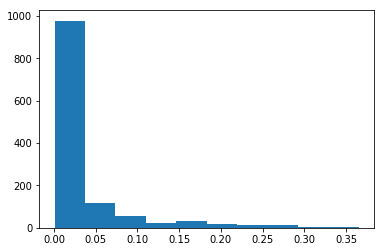

In [23]:
plt.hist(list(nx.degree_centrality(G_2015).values()))
plt.show()

#### Exercise! (Actually this is a game :D)

How can we decrease the avg shortest path length of this network?

Think of an effective way to add new edges to decrease the avg shortest path length.
Let's see if we can come up with a nice way to do this, and the one who gets the highest decrease wins!!!

The rules are simple:
- You can't add more than 2% of the current edges( ~500 edges)

In [ ]:
sort_degree = sorted(nx.degree_centrality(G_2015).items(), key=lambda x:x[1], reverse=True)

In [ ]:
top_count = 0
for n, v in sort_degree:
    count = 0
    for node, val in sort_degree:
        if node != n:
            if node not in G_2015.adj[n]:
                G_2015.add_edge('ATL', node)
                count += 1
                if count == 25:
                    break
    top_count += 1
    if top_count == 20:
        break

In [ ]:
G_2015.number_of_edges()

In [ ]:
nx.average_shortest_path_length(G_2015) 

In [ ]:
0.021171454532745937/3.028101946281858 *100